In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 56s 0us/step


In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape


(50000, 1)

In [6]:
y_test.shape

(10000, 1)

[9]


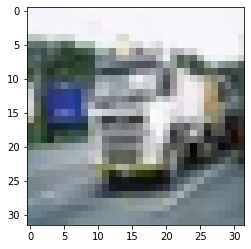

In [8]:
i = 1000
plt.imshow(X_train[i])
print(y_train[i])

C:\Users\F\Anaconda3\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


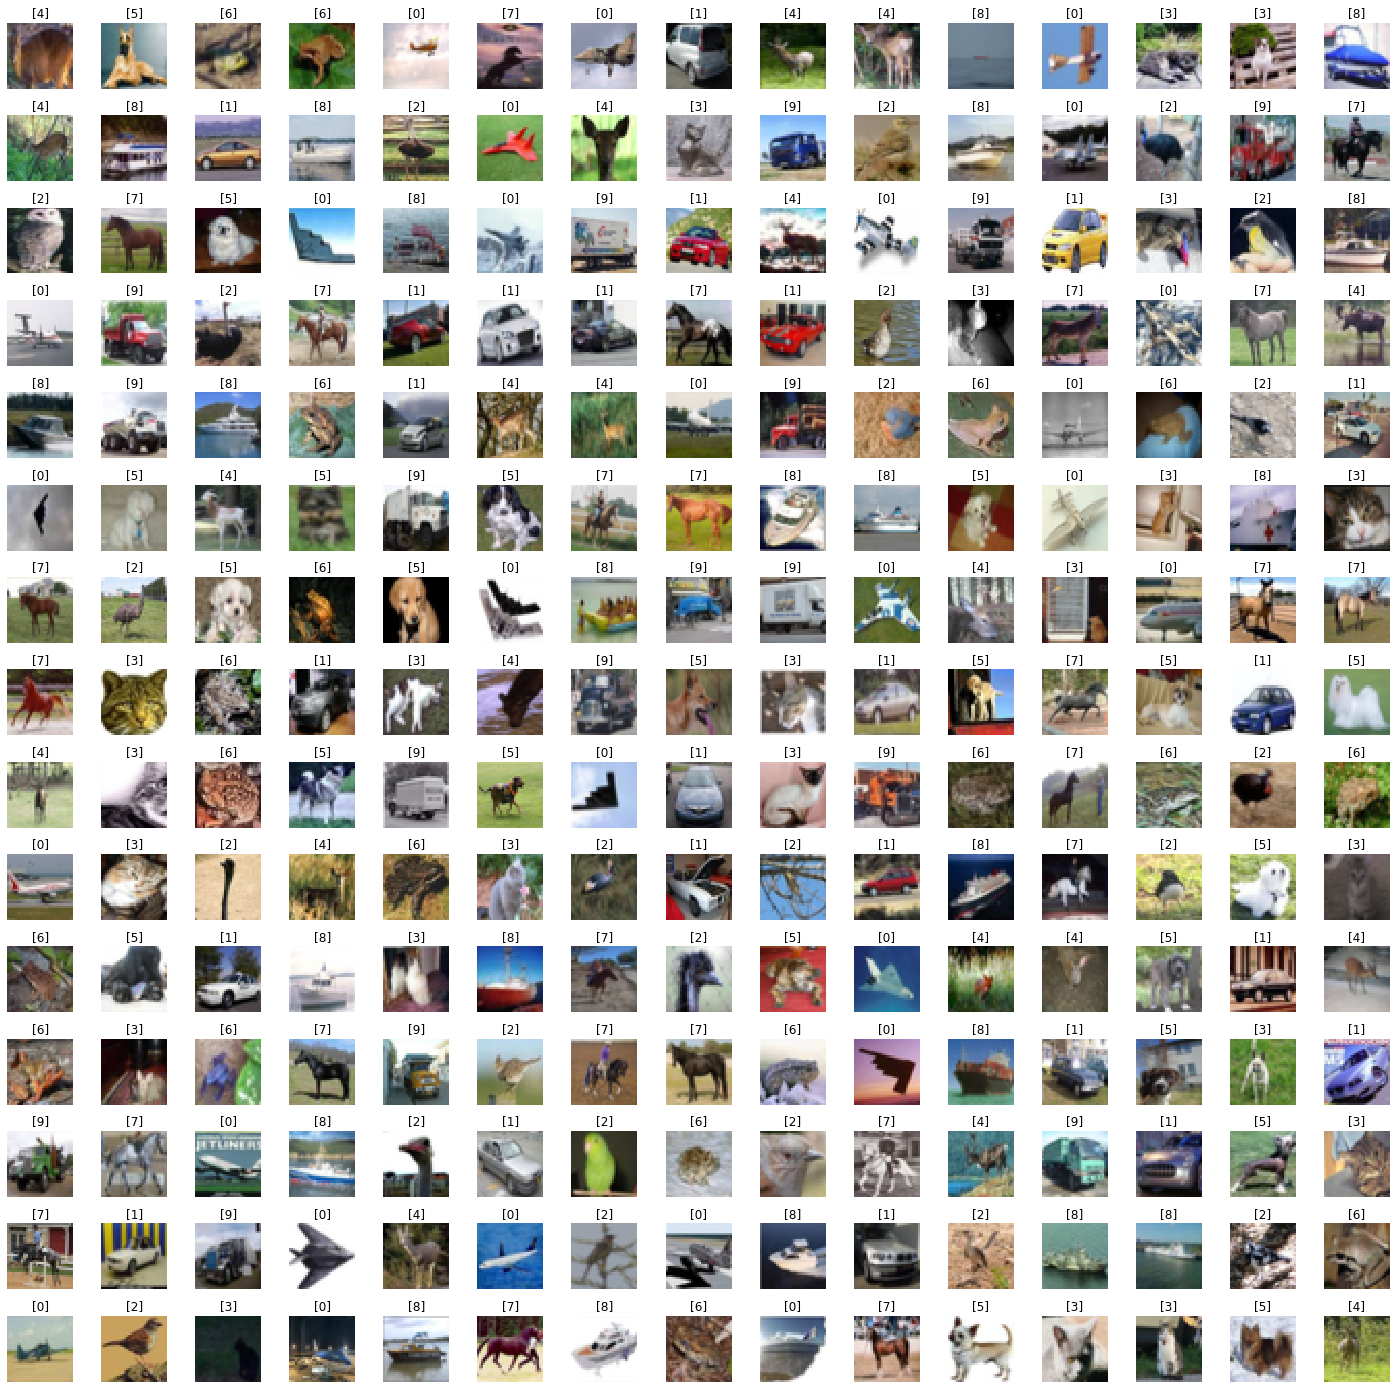

In [12]:
W_grid = 15
L_grid = 15
fig, axes = plt.subplots(L_grid, W_grid, figsize = (25,25))
axes  =  axes.ravel()
n_training = len(X_train)

for i in  np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, n_training)
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

In [11]:
n_training

50000

In [ ]:
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')

In [13]:
num_cat = 10

In [14]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [15]:
import keras
y_train = keras.utils.to_categorical(y_train, num_cat)

In [16]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [17]:
y_test = keras.utils.to_categorical(y_test, num_cat)

In [18]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [19]:
X_train = X_train/255
X_test  = X_test/255

In [20]:
X_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [21]:
X_test

array([[[[0.61960784, 0.43921569, 0.19215686],
         [0.62352941, 0.43529412, 0.18431373],
         [0.64705882, 0.45490196, 0.2       ],
         ...,
         [0.5372549 , 0.37254902, 0.14117647],
         [0.49411765, 0.35686275, 0.14117647],
         [0.45490196, 0.33333333, 0.12941176]],

        [[0.59607843, 0.43921569, 0.2       ],
         [0.59215686, 0.43137255, 0.15686275],
         [0.62352941, 0.44705882, 0.17647059],
         ...,
         [0.53333333, 0.37254902, 0.12156863],
         [0.49019608, 0.35686275, 0.1254902 ],
         [0.46666667, 0.34509804, 0.13333333]],

        [[0.59215686, 0.43137255, 0.18431373],
         [0.59215686, 0.42745098, 0.12941176],
         [0.61960784, 0.43529412, 0.14117647],
         ...,
         [0.54509804, 0.38431373, 0.13333333],
         [0.50980392, 0.37254902, 0.13333333],
         [0.47058824, 0.34901961, 0.12941176]],

        ...,

        [[0.26666667, 0.48627451, 0.69411765],
         [0.16470588, 0.39215686, 0.58039216]

In [22]:
Input_shape = X_train.shape[1:]

In [23]:
Input_shape

(32, 32, 3)

In [25]:
from keras.models import Sequential
from keras.layers import  Conv2D,  MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [27]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = Input_shape))
cnn_model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.3))


cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.2))

cnn_model.add(Flatten())

cnn_model.add(Dense(units  = 512, activation = 'relu'))
cnn_model.add(Dense(units  = 512, activation = 'relu'))
cnn_model.add(Dense(units = 10, activation = 'softmax'))


In [28]:
cnn_model.compile(loss = 'categorical_crossentropy', optimizer = keras.optimizers.rmsprop(lr = 0.001), metrics = ['accuracy'])

In [29]:
history = cnn_model.fit(X_train, y_train, batch_size=32, epochs=2, shuffle=True)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/2
50000/50000 [==============================] - 211s 4ms/step - loss: 1.5828 - acc: 0.4240
Epoch 2/2
50000/50000 [==============================] - 208s 4ms/step - loss: 1.1921 - acc: 0.5784


In [30]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy {}'.format(evaluation[1]))

10000/10000 [==============================] - 7s 727us/step
Test Accuracy 0.5802


In [31]:
prediction = cnn_model.predict_classes(X_test)
prediction

array([3, 8, 8, ..., 5, 4, 7], dtype=int64)

In [32]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [33]:
y_test = y_test.argmax(1)

In [34]:
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

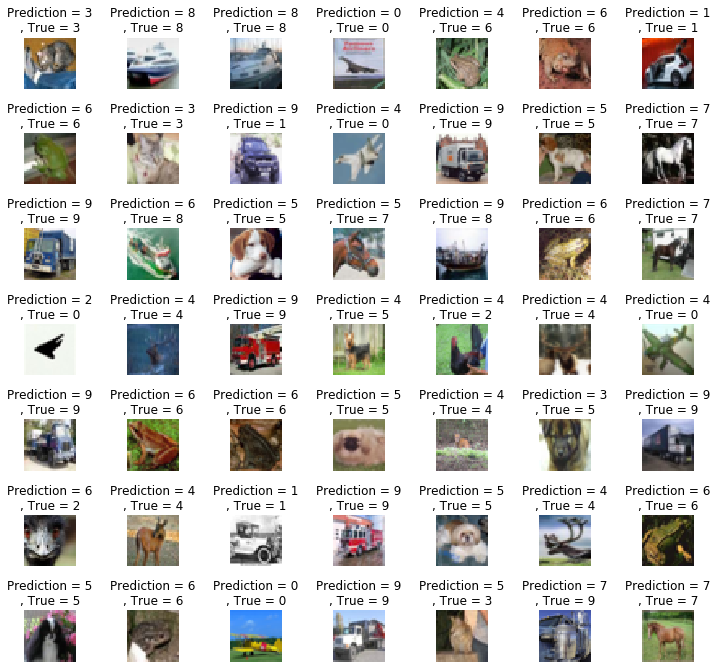

In [36]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for  i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n, True = {}'.format(prediction[i], y_test[i]))
    axes[i].axis('off')
    
plt.subplots_adjust(wspace = 1)

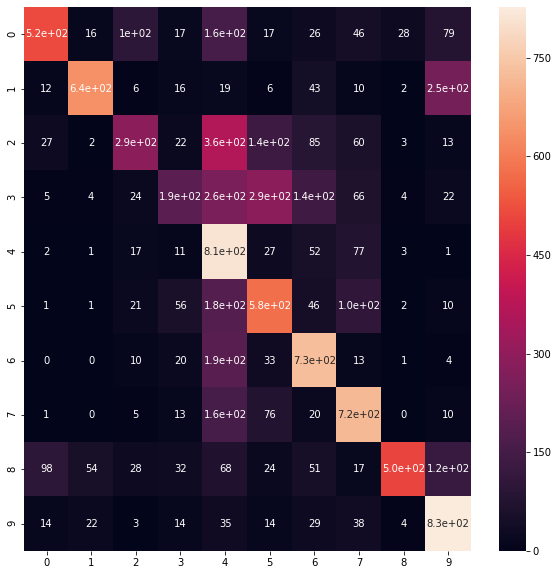

In [39]:
from sklearn.metrics import confusion_matrix
import seaborn as sb
cm = confusion_matrix(y_test, prediction)
cm
plt.figure(figsize = (10,10))
sb.heatmap(cm, annot=True)

In [40]:
import os
directory = os.path.join(os.getcwd(), 'saved_models')
if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory, 'keras_cifar_10_trained_model.h5')
cnn_model.save(model_path)

In [2]:
from keras.datasets import cifar10
(X_train, y_train),  (X_test, y_test) = cifar10.load_data()

Using TensorFlow backend.


In [4]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [5]:
X_train.shape

(50000, 32, 32, 3)

In [11]:
n = 8
X_train_sample = X_train[:n]

In [12]:
X_train_sample.shape

(8, 32, 32, 3)

In [14]:
from keras.preprocessing.image import ImageDataGenerator
dataget_train = ImageDataGenerator(rotation_range = 90)
dataget_train.fit(X_train_sample)

In [ ]:
from scipy.misc import toimage
fig = plt.figure(figsize = (20,2))
for x_batch  in dataget_train.flow(X_train_sample, batch_size = n):
    for i in  range(0,n):
        ax = fig.add_subplot(1,  n, i+1)
        ax.imshow(toimage(x_batch[i]))
        fig.suptitle('Augmented images (rotated 90 degree)')
        plt.show()
        break;